### req

In [41]:
!python -m pip install -r requirements.txt

## 1a

In [2]:
import numpy as np
import cv2
# from mat4py import loadmat
import os, shutil
import scipy.io as sio
import matplotlib.pyplot as plt
import ipympl

In [3]:
mat = sio.loadmat("HouseTallBasler64.mat")
seq = mat["mexVims"]
# W = mat["W"]*2
W_alt = mat["W"]*2
N = mat["NrFrames"].item()
m = W_alt.shape[1]

# centroids = W_alt.mean(axis=1).reshape(-1,1)

W = np.array(
    [np.array([W_alt[i], W_alt[N+i]]) for i in range(N)]
    ).reshape(-1,7)

# W = W_alt
centroids = W.mean(axis=1).reshape(-1,1)






In [4]:
W = W - centroids
U, S, Vh = np.linalg.svd(W)


In [5]:
M = np.hstack((
    (S[0] * U[:,0]).reshape(-1,1),
    (S[1] * U[:,1]).reshape(-1,1),
    (S[2] * U[:,2]).reshape(-1,1)
))

In [6]:
M.shape

(128, 3)

In [7]:
S3 = np.diag(S)[:3]
U3 = U[:,:3]

In [8]:
U3.shape, S3.shape

((128, 3), (3, 7))

In [9]:
X = Vh.T[:,:3].T
X.shape

(3, 7)

In [10]:
X

array([[ 0.21587813,  0.19570552,  0.4235953 ,  0.43285837, -0.42950373,
        -0.49754158, -0.34099201],
       [-0.38598591,  0.1936022 , -0.20556355,  0.31078083, -0.6069224 ,
         0.16613349,  0.52795534],
       [-0.01096671,  0.39949177, -0.24049778,  0.06862143, -0.15178742,
         0.5810003 , -0.64586159]])

In [11]:
'''
[ 0.21587813,  0.19570552,  0.4235953 ,  0.43285837, -0.42950373, -0.49754158, -0.34099201],
[-0.38598591,  0.1936022 , -0.20556355,  0.31078083, -0.6069224 , 0.16613349,  0.52795534],
[-0.01096671,  0.39949177, -0.24049778,  0.06862143, -0.15178742, 0.5810003 , -0.64586159]
'''

''

''

Text(0.5, 0, 'z')

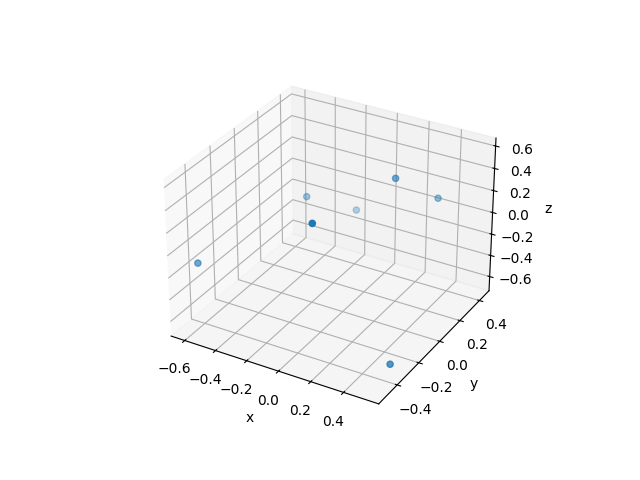

In [14]:
# X[:,0]
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.scatter(X[:,0]/X[:,2], X[:,1]/X[:,2])
# ax.scatter(X[0,:], X[1,:])
ax.scatter(X[1,:], X[0,:], X[2,:])
# ax.scatter(X[0,:], X[1,:], X[2,:])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [ ]:
'''
[4.11327346e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]
[0.00000000e+00, 2.34083667e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
[0.00000000e+00, 0.00000000e+00, 1.43922054e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.39820466e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.13105138e+01, 0.00000000e+00, 0.00000000e+00],
[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.92262864e+00, 0.00000000e+00],
[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.63373239e-13]
'''

In [15]:
syn = sio.loadmat("affrec1.mat")



In [36]:
Xs = syn["X"]
pol = syn["polys1"]

In [28]:
syn.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'polys1', 'W'])

In [31]:
seq.shape

(640, 480, 64)

In [35]:
syn["W"].shape

(100, 240)

In [30]:
syn["polys1"].shape

(147, 4)

In [38]:
Xs.shape

(4, 240)

Text(0.5, 0, 'z')

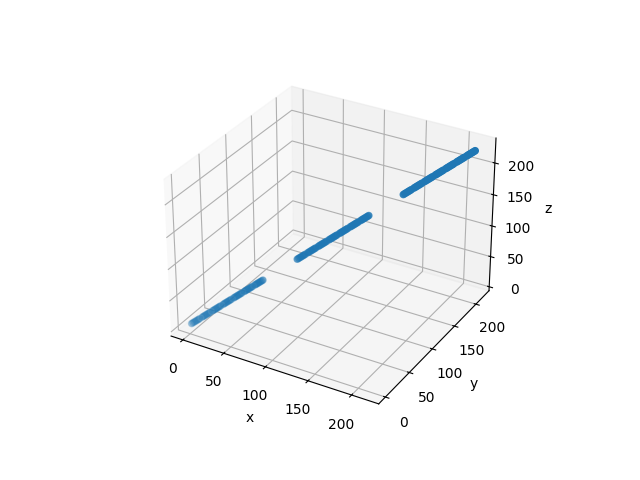

In [39]:
# X[:,0]
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.scatter(X[:,0]/X[:,2], X[:,1]/X[:,2])
# ax.scatter(X[0,:], X[1,:])
# ax.scatter(Xs[0,:], Xs[1,:], Xs[2,:])
ax.scatter(pol[:,0], pol[:,1], pol[:,2])
# ax.scatter(X[0,:], X[1,:], X[2,:])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")